In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Preview:
   Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final

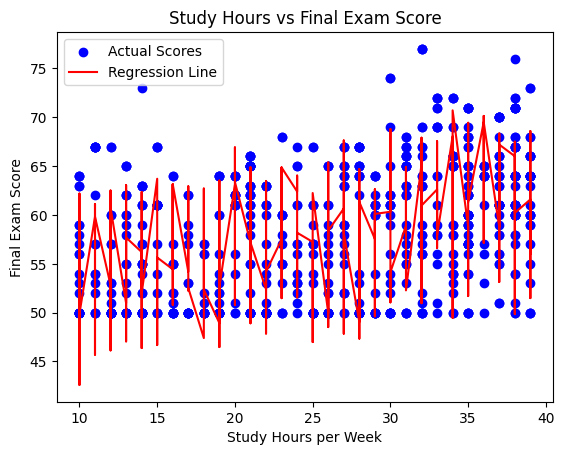

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = "/content/drive/MyDrive/student_performance_dataset.csv"
df = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:\n", df.head())
print("\nDataset Columns:\n", df.columns)

# Selecting relevant features and target variable
features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores']
categorical_features = ['Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
target = 'Final_Exam_Score'  # Dependent variable

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Combine numerical and encoded categorical features
X = pd.concat([df[features], df_encoded], axis=1)
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the exam scores
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nModel Performance:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualizing Study Hours vs Final Exam Score
plt.scatter(df['Study_Hours_per_Week'], df['Final_Exam_Score'], color='blue', label='Actual Scores')

# Sorting for a smooth regression line
sorted_indices = np.argsort(df['Study_Hours_per_Week'])
sorted_hours = df['Study_Hours_per_Week'].iloc[sorted_indices]
sorted_predictions = model.predict(X.iloc[sorted_indices])

plt.plot(sorted_hours, sorted_predictions, color='red', label='Regression Line')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Exam Score')
plt.legend()
plt.title('Study Hours vs Final Exam Score')
plt.show()
